In [1]:
import pandas as pd

In [2]:
accre = pd.read_csv('accre-gpu-jobs-2022-v2.csv', error_bad_lines=False)

b'Skipping line 124084: expected 12 fields, saw 13\nSkipping line 124809: expected 12 fields, saw 13\n'


In [3]:
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [4]:
accre.shape

(336950, 12)

In [5]:
accre['USEDTIME'].value_counts()

00:00:00       51083
00:00:07       19788
00:00:08       11147
00:00:09        6900
00:00:06        5785
               ...  
20:03:50           1
49-03:28:28        1
03:26:39           1
19:44:25           1
49-08:30:18        1
Name: USEDTIME, Length: 20818, dtype: int64

In [6]:
accre.dtypes

JOBID        object
ACCOUNT      object
USER         object
USEDMEM      object
REQTIME      object
USEDTIME     object
NODES         int64
CPUS          int64
GPUS          int64
PARTITION    object
EXITCODE     object
STATE        object
dtype: object

In [7]:
accre.USEDTIME = accre.USEDTIME.str.replace('-','days ',regex=True)

In [8]:
accre.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED


In [9]:
accre['USEDTIMEtd'] = pd.to_timedelta(accre['USEDTIME'])

In [10]:
accre.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10


In [11]:
accre['USEDTIMEtd'].dt.total_seconds()

0           793.0
1            22.0
2           537.0
3         18586.0
4         15070.0
           ...   
336945      427.0
336946        0.0
336947        0.0
336948       86.0
336949        0.0
Name: USEDTIMEtd, Length: 336950, dtype: float64

In [12]:
accre['usedtime_seconds'] = accre['USEDTIMEtd'].dt.total_seconds()

In [13]:
accre.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0


In [14]:
accre.tail()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING,0 days 00:07:07,427.0
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,0 days 00:00:00,0.0
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,0 days 00:00:00,0.0
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED,0 days 00:01:26,86.0
336949,46754618,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,0 days 00:00:00,0.0


In [15]:
accre_filtered = accre[accre['usedtime_seconds'] != 0.0]

In [16]:
accre_filtered = accre[accre['STATE'] == 'COMPLETED']

In [17]:
accre_filtered.shape

(283333, 14)

In [18]:
accre_filtered.tail()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds
336933,46753813,harovin,shannon,137.96M,5-00:00:00,00:00:52,1,1,1,turing,0:0,COMPLETED,0 days 00:00:52,52.0
336934,46753820_26,harovin,porsha,5093.70M,5-00:00:00,00:34:51,1,6,1,turing,0:0,COMPLETED,0 days 00:34:51,2091.0
336936,46753823,harovin,shannon,156.21M,5-00:00:00,00:04:03,1,1,1,turing,0:0,COMPLETED,0 days 00:04:03,243.0
336942,46754095,harovin,shannon,2820.52M,5-00:00:00,00:11:13,1,1,1,turing,0:0,COMPLETED,0 days 00:11:13,673.0
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED,0 days 00:01:26,86.0


In [19]:
accre_filtered.USEDMEM= accre_filtered.USEDMEM.str.replace('M','',regex=True)

C:\Users\17202\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
accre_filtered.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0


In [21]:
accre_filtered.dtypes

JOBID                        object
ACCOUNT                      object
USER                         object
USEDMEM                      object
REQTIME                      object
USEDTIME                     object
NODES                         int64
CPUS                          int64
GPUS                          int64
PARTITION                    object
EXITCODE                     object
STATE                        object
USEDTIMEtd          timedelta64[ns]
usedtime_seconds            float64
dtype: object

In [22]:
accre_filtered.USEDMEM = accre_filtered['USEDMEM'].str.strip()

C:\Users\17202\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
accre_filtered = accre_filtered.astype({"USEDMEM":'float'})

In [24]:
#df4_SC['weighted_memorry'] = (df4_SC['MEM']/df4_SC['GPUS'])*df4_SC['USED_SEC']

In [25]:
accre_filtered['gpu_mem_time'] = sum(accre_filtered['USEDMEM']/accre_filtered['GPUS'] * accre_filtered['usedtime_seconds'])/sum(accre_filtered['usedtime_seconds'])

In [26]:
accre_filtered.head(5)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds,gpu_mem_time
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0,4958.187596
1,32880701,glasshouse,brady,0.00,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0,4958.187596
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0,4958.187596
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0,4958.187596
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0,4958.187596


In [27]:
accre_filtered.groupby(['PARTITION'])['gpu_mem_time'].sum()

PARTITION
maxwell    6.299030e+08
pascal     4.031701e+08
turing     3.717451e+08
Name: gpu_mem_time, dtype: float64

In [28]:
# 4) What is the distribution of different groups and users accessing each partition? In each partition, who are the top users, and do they represent a majority of the runtime-weighted jobs on the partition?

In [29]:
accre_filtered.groupby(['PARTITION', 'ACCOUNT'])['USER'].value_counts().nlargest()

PARTITION  ACCOUNT     USER   
maxwell    glasshouse  marnie     112903
turing     glasshouse  margret     58931
pascal     glasshouse  marnie      24777
           malanga     arline       9851
           virginia    hillery      8413
Name: USER, dtype: int64

In [30]:
# 5) Currently there is a 5 day limit on runtime for GPU jobs, although some users have been asking for extensions. What is the distribution of requested runtime and actual runtime on jobs on each partition? Do users really need more time, or are they simply always requesting the maximum?

In [31]:
accre_filtered.REQTIME = accre_filtered.REQTIME.str.replace('-','days ',regex=True)
accre_filtered['REQTIMEtd'] = pd.to_timedelta(accre_filtered['REQTIME'])
accre_filtered['reqtime_seconds'] = accre_filtered['REQTIMEtd'].dt.total_seconds()
accre_filtered.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds,gpu_mem_time,REQTIMEtd,reqtime_seconds
0,32880657,malanga,arline,18.66,2days 00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0,4958.187596,2 days 00:00:00,172800.0
1,32880701,glasshouse,brady,0.00,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0,4958.187596,0 days 05:00:00,18000.0
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0,4958.187596,0 days 05:00:00,18000.0
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0,4958.187596,0 days 20:00:00,72000.0
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0,4958.187596,0 days 15:00:00,54000.0


In [37]:
accre_filtered.groupby(['PARTITION'])['reqtime_seconds', 'usedtime_seconds'].mean()

<ipython-input-37-432574008fe4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  accre_filtered.groupby(['PARTITION'])['reqtime_seconds', 'usedtime_seconds'].mean()


,reqtime_seconds,usedtime_seconds
PARTITION,,
maxwell,54195.717985,1756.219650
pascal,172222.984234,10223.384202
turing,49249.841549,7322.140192


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

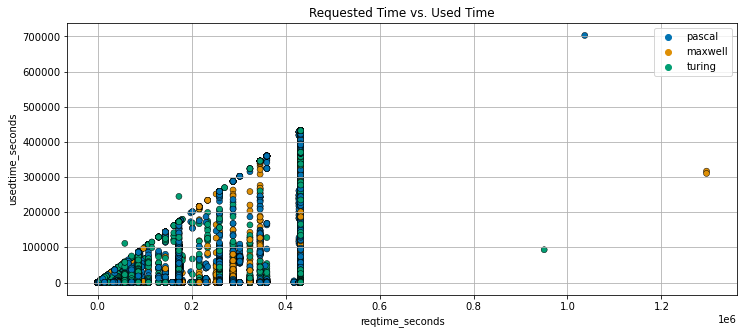

In [41]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = accre_filtered, x = 'reqtime_seconds', y = 'usedtime_seconds',
hue = 'PARTITION', palette = 'colorblind', edgecolor = 'black')
plt.title('Requested Time vs. Used Time')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0));

In [ ]:
sns.displot(accre_filtered, x="flipper_length_mm", binwidth=3)